# Проект - Влияние условий жизни учащихся на их успеваемость по математике
## Описание
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
## Задачи

* провести разведывательный анализ данных 
* по результатам составить отчёт

## Описание датасета
1. **school** — аббревиатура школы, в которой учится ученик
2. **sex** — пол ученика:
    * 'F' - женский, 
    * 'M' - мужской
3. **age** — возраст ученика (от 15 до 22)
4. **address** — тип адреса ученика:
    * 'U' - городской, 
    * 'R' - за городом
5. **famsize** — размер семьи:
    * 'LE3' <= 3, 
    * 'GT3' >3
6. **Pstatus** — статус совместного жилья родителей:
    * 'T' - живут вместе, 
    * 'A' - раздельно
7. **Medu** — образование матери:
    * 0 - нет, 
    * 1 - 4 класса, 
    * 2 - 5-9 классы, 
    * 3 - среднее специальное или 11 классов, 
    * 4 - высшее
8. **Fedu** — образование отца:
    * 0 - нет, 
    * 1 - 4 класса, 
    * 2 - 5-9 классы, 
    * 3 - среднее специальное или 11 классов, 
    * 4 - высшее
9. **Mjob** — работа матери:
    * 'teacher' - учитель, 
    * 'health' - сфера здравоохранения, 
    * 'services' - гос служба, 
    * 'at_home' - не работает,
    * 'other' - другое
10. **Fjob** — работа отца:
    * 'teacher' - учитель, 
    * 'health' - сфера здравоохранения, 
    * 'services' - гос служба, 
    * 'at_home' - не работает, 
    * 'other' - другое
11. **reason** — причина выбора школы: 
    * 'home' - близость к дому, 
    * 'reputation' - репутация школы, 
    * 'course' - образовательная программа, 
    * 'other' - другое
12. **guardian** — опекун: 
    * 'mother' - мать, 
    * 'father' - отец, 
    * 'other' - другое
13. **traveltime** — время в пути до школы:
    * 1 - <15 мин., 
    * 2 - 15-30 мин., 
    * 3 - 30-60 мин., 
    * 4 - >60 мин.
14. **studytime** — время на учёбу помимо школы в неделю:
    * 1 - <2 часов, 
    * 2 - 2-5 часов, 
    * 3 - 5-10 часов, 
    * 4 - >10 часов
15. **failures** — количество внеучебных неудач:
    * n, если 1<=n<=3, 
    * иначе 0
16. **schoolsup** — дополнительная образовательная поддержка (yes или no)
17. **famsup** — семейная образовательная поддержка (yes или no)
18. **paid** — дополнительные платные занятия по математике (yes или no)
19. **activities** — дополнительные внеучебные занятия (yes или no)
20. **nursery** — посещал детский сад (yes или no)
21. **higher** — хочет получить высшее образование (yes или no)
22. **internet** — наличие интернета дома (yes или no)
23. **romantic** — в романтических отношениях (yes или no)
24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. **absences** — количество пропущенных занятий
29. **score** — баллы по госэкзамену по математике

In [1]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# Увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 5

# Подключаем форматирование Markdown
from IPython.display import Markdown

In [2]:
# Загрузка датасета
student_df = pd.read_csv('stud_math.csv')
# Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов
display(student_df.head(10))
student_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Функции

In [3]:
def top_freq_value(series, delimiter=' ', dropna=True, top=0):
    '''Выводит статистику самых встречающихся значений в столбце'''
    value_series = series.value_counts(dropna=dropna)
    value_list = [f'{index} - {value}' for index, value in value_series.items()]
    if top == 0:
        return delimiter.join(value_list)
    else:
        return delimiter.join(value_list[0:min(top, len(value_series))])


def dataset_custom_description(dataset):
    '''Выводит дополнительную информацию о датасете'''

    count_any_null = dataset[dataset.isnull().any(1)].shape[0]
    count_not_any_null = dataset.shape[0] - count_any_null
    types_info = "<br>".join([f'{index} ({value})' for index, value in dataset.dtypes.value_counts().items()])

    display(Markdown(f'## Общая информация'))
    display(Markdown(f'''| Характеристика   |      Значение      |
                        |:----------|:-------------|
                        |**количество (строк, столбцов):**|({dataset.shape[0]}, {dataset.shape[1]})|
                        |**количество строк:<br><small>(ни одного пустого значения)</small>**|{count_not_any_null}|
                        |**количество строк:<br><small>(хотябы одно пустое значение)</small>**|{count_any_null}|
                        |**распределение типов столбцов:**|{types_info}|
                        '''))

    # формируем более информативную таблицу о датасете
    display(Markdown(f'## Информация о столбцах'))
    data = {'name': [], 'type': [], 'non_null': [], 'null': [], 'null_mean': [], 'unique': [], 'mean': [], 'std': [], 'min': [], '25%': [], '50%': [], '75%': [], 'max': [], 'distribution': []}

    for column_name, column_type in dataset.dtypes.items():
        column_series = dataset[column_name]
        
        data['name'].append(column_name)
        data['type'].append(str(column_type))
        data['non_null'].append(column_series.count())
        data['null'].append(column_series.isna().sum())
        data['null_mean'].append(f'{column_series.isna().mean() :.1%}')
        data['unique'].append(column_series.nunique())
       
        data['mean'].append(f'{column_series.mean() :.2f}' if column_series.dtype != 'object' else '')
        data['std'].append(f'{column_series.std() :.2f}' if column_series.dtype != 'object' else '')

        data['min'].append(column_series.min() if column_series.dtype != 'object' else '')
        data['25%'].append(column_series.quantile(0.25) if column_series.dtype != 'object' else '')
        data['50%'].append(column_series.quantile(0.5) if column_series.dtype != 'object' else '')
        data['75%'].append(column_series.quantile(0.75) if column_series.dtype != 'object' else '')
        data['max'].append(column_series.max() if column_series.dtype != 'object' else '')
        
        data['distribution'].append(top_freq_value(column_series, ' | ', False))
        
    data = pd.DataFrame(data=data)

    with pd.option_context('display.max_colwidth', None, 'display.max_rows', None, 'display.max_columns', None):
        display(data)


def distribution_data_in_columns(dataset, dropna=True):
    '''Выводит распределение данных для каждого столбца в датасете'''
    l = ['| Столбец | Распределение |', '|:--------|:--------------|']
        
    for column in dataset.columns:
        l.append(f'|**{column} ({dataset[column].value_counts().count()}):**|{top_freq_value(dataset[column],"<br>",dropna=dropna)}|')

    display(Markdown('\n'.join(l)))


def get_emission_limits(data_series):
    '''Возвращает кортеж границ выбросов вычесленных на основе межвартильного размаха'''
    perc25 = data_series.quantile(0.25)
    perc75 = data_series.quantile(0.75)
    IQR = perc75 - perc25
    min_emission_limits = perc25 - 1.5*IQR
    max_emission_limits = perc75 + 1.5*IQR

    '''Выводит распределение данных для каждого столбца в датасете'''
    l = ['| Min | 25 | IQR | 75 | Max |',
         '|-----|----|-----|----|-----|',
        f'{min_emission_limits}|{perc25}|{IQR}|{perc75}|{max_emission_limits}']
            
    display(Markdown('\n'.join(l)))
    return (min_emission_limits, max_emission_limits)


def convert_feature_to_binary(series_column: pd.Series, binary_dict):
    ''' Производит преобразование номинативных переменных в количественные (бинарные)'''
    binary_dict.update({0: 0, 1: 1})  # значения  0: 0, 1:1 добавлены для того, чтобы при повторном выполеннии кода значения не заменялись на NaN
    return series_column.map(binary_dict).astype('float')


def fill_nan(dataset, columns_list, fill_type='median'):
    '''Заполняет пропуски на медианой или модой'''
    for column in columns_list:
        fill_value = np.nan

        if fill_type == 'median':
            fill_value = dataset[column].median()
        elif fill_type == 'mode':
            fill_value = dataset[column].mode()[0]
        else:
            break

        dataset.fillna(value={column: fill_value}, inplace=True)
    
    return dataset


def get_boxplot(dataset, column, value, kind=True):
    '''Отображет boxplot'''
    fig, ax = plt.subplots(figsize=(10, 4))
    
    if kind:
        sns.boxplot(x=column, y=value, data=dataset, ax=ax)
    else:
        sns.violinplot(x=column, y=value, data=dataset, ax=ax)
    # plt.xticks(rotation=45)
    # ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(dataset, column, value):
    '''Тест Стьюдента'''
    cols = dataset[column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    
    flag = True
    for comb in combinations_all:
        if ttest_ind(dataset[dataset[column] == comb[0]][value],
                     dataset[dataset[column] == comb[1]][value]).pvalue \
            <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для переменной', column)
            flag = False
            break
    
    if flag:
        print('Не найдены статистически значимые различия для переменной', column)


def get_stat_dif_custom(dataset, columns, value):
    '''Тест Стьюдента для списка столбцов и с красивым выводом'''
    l = ['| Переменная | Результат |',
         '|------------|-----------|']
    
    non_stat_dif = []  # список статистически незначимых переменных

    for column in columns:
        cols = dataset[column].value_counts().index
        combinations_all = list(combinations(cols, 2))
        
        flag = True
        for comb in combinations_all:
            
            if ttest_ind(dataset[dataset[column] == comb[0]][value],
                         dataset[dataset[column] == comb[1]][value]).pvalue \
                         <= 0.05/len(combinations_all):  # Учли поправку Бонферони
                l.append(f'|{column}|есть|')
                flag = False
                break
        
        if flag:
            l.append(f'|{column}|нет|')
            non_stat_dif.append(column)

    display(Markdown('Cтатистически значимые различия'), Markdown('\n'.join(l)))
    return non_stat_dif



## Предобработка

In [4]:
# Переименование столбцов
student_df.columns = student_df.columns.map(lambda x: x.lower())
student_df.rename({'studytime, granular': 'studytime_granular'}, axis=1, inplace=True)  # этого столбца нет в описании датасета
#student_df.info()

## 1. Первичная обработка данных

In [5]:
# Отображени более общей информации о датасете
#display(student_df.describe(include='all'))
dataset_custom_description(student_df)

## Общая информация

| Характеристика   |      Значение      |
                        |:----------|:-------------|
                        |**количество (строк, столбцов):**|(395, 30)|
                        |**количество строк:<br><small>(ни одного пустого значения)</small>**|97|
                        |**количество строк:<br><small>(хотябы одно пустое значение)</small>**|298|
                        |**распределение типов столбцов:**|object (17)<br>float64 (12)<br>int64 (1)|
                        

## Информация о столбцах

,name,type,non_null,null,null_mean,unique,mean,std,min,25%,50%,75%,max,distribution
0,school,object,395,0,0.0%,2,,,,,,,,GP - 349 | MS - 46
1,sex,object,395,0,0.0%,2,,,,,,,,F - 208 | M - 187
2,age,int64,395,0,0.0%,8,16.70,1.28,15,16,17,18,22,16 - 104 | 17 - 98 | 18 - 82 | 15 - 82 | 19 - 24 | 20 - 3 | 22 - 1 | 21 - 1
3,address,object,378,17,4.3%,2,,,,,,,,U - 295 | R - 83 | nan - 17
4,famsize,object,368,27,6.8%,2,,,,,,,,GT3 - 261 | LE3 - 107 | nan - 27
5,pstatus,object,350,45,11.4%,2,,,,,,,,T - 314 | nan - 45 | A - 36
6,medu,float64,392,3,0.8%,5,2.75,1.10,0,2,3,4,4,4.0 - 131 | 2.0 - 102 | 3.0 - 97 | 1.0 - 59 | 0.0 - 3 | nan - 3
7,fedu,float64,371,24,6.1%,6,2.61,2.23,0,2,2,3,40,2.0 - 106 | 3.0 - 96 | 4.0 - 88 | 1.0 - 78 | nan - 24 | 0.0 - 2 | 40.0 - 1
8,mjob,object,376,19,4.8%,5,,,,,,,,other - 133 | services - 98 | at_home - 58 | teacher - 55 | health - 32 | nan - 19
9,fjob,object,359,36,9.1%,5,,,,,,,,other - 197 | services - 102 | nan - 36 | teacher - 29 | at_home - 16 | health - 15


In [6]:
# Посмотрим на распределение признаков в датасете (значение nan выводим для наглядности)
distribution_data_in_columns(student_df,False)

| Столбец | Распределение |
|:--------|:--------------|
|**school (2):**|GP - 349<br>MS - 46|
|**sex (2):**|F - 208<br>M - 187|
|**age (8):**|16 - 104<br>17 - 98<br>18 - 82<br>15 - 82<br>19 - 24<br>20 - 3<br>22 - 1<br>21 - 1|
|**address (2):**|U - 295<br>R - 83<br>nan - 17|
|**famsize (2):**|GT3 - 261<br>LE3 - 107<br>nan - 27|
|**pstatus (2):**|T - 314<br>nan - 45<br>A - 36|
|**medu (5):**|4.0 - 131<br>2.0 - 102<br>3.0 - 97<br>1.0 - 59<br>0.0 - 3<br>nan - 3|
|**fedu (6):**|2.0 - 106<br>3.0 - 96<br>4.0 - 88<br>1.0 - 78<br>nan - 24<br>0.0 - 2<br>40.0 - 1|
|**mjob (5):**|other - 133<br>services - 98<br>at_home - 58<br>teacher - 55<br>health - 32<br>nan - 19|
|**fjob (5):**|other - 197<br>services - 102<br>nan - 36<br>teacher - 29<br>at_home - 16<br>health - 15|
|**reason (4):**|course - 137<br>home - 104<br>reputation - 103<br>other - 34<br>nan - 17|
|**guardian (3):**|mother - 250<br>father - 86<br>nan - 31<br>other - 28|
|**traveltime (4):**|1.0 - 242<br>2.0 - 96<br>nan - 28<br>3.0 - 22<br>4.0 - 7|
|**studytime (4):**|2.0 - 194<br>1.0 - 103<br>3.0 - 64<br>4.0 - 27<br>nan - 7|
|**failures (4):**|0.0 - 293<br>1.0 - 49<br>nan - 22<br>2.0 - 16<br>3.0 - 15|
|**schoolsup (2):**|no - 335<br>yes - 51<br>nan - 9|
|**famsup (2):**|yes - 219<br>no - 137<br>nan - 39|
|**paid (2):**|no - 200<br>yes - 155<br>nan - 40|
|**activities (2):**|yes - 195<br>no - 186<br>nan - 14|
|**nursery (2):**|yes - 300<br>no - 79<br>nan - 16|
|**studytime_granular (4):**|-6.0 - 194<br>-3.0 - 103<br>-9.0 - 64<br>-12.0 - 27<br>nan - 7|
|**higher (2):**|yes - 356<br>nan - 20<br>no - 19|
|**internet (2):**|yes - 305<br>no - 56<br>nan - 34|
|**romantic (2):**|no - 240<br>yes - 124<br>nan - 31|
|**famrel (6):**|4.0 - 182<br>5.0 - 99<br>3.0 - 62<br>nan - 27<br>2.0 - 17<br>1.0 - 7<br>-1.0 - 1|
|**freetime (5):**|3.0 - 153<br>4.0 - 112<br>2.0 - 63<br>5.0 - 38<br>1.0 - 18<br>nan - 11|
|**goout (5):**|3.0 - 127<br>2.0 - 101<br>4.0 - 84<br>5.0 - 52<br>1.0 - 23<br>nan - 8|
|**health (5):**|5.0 - 138<br>3.0 - 89<br>4.0 - 63<br>1.0 - 47<br>2.0 - 43<br>nan - 15|
|**absences (36):**|0.0 - 111<br>2.0 - 60<br>4.0 - 53<br>6.0 - 31<br>8.0 - 21<br>10.0 - 17<br>12.0 - 12<br>nan - 12<br>14.0 - 12<br>3.0 - 8<br>16.0 - 7<br>7.0 - 6<br>5.0 - 5<br>18.0 - 5<br>20.0 - 4<br>1.0 - 3<br>22.0 - 3<br>9.0 - 3<br>13.0 - 2<br>15.0 - 2<br>11.0 - 2<br>25.0 - 1<br>54.0 - 1<br>385.0 - 1<br>26.0 - 1<br>56.0 - 1<br>24.0 - 1<br>212.0 - 1<br>21.0 - 1<br>75.0 - 1<br>30.0 - 1<br>19.0 - 1<br>38.0 - 1<br>40.0 - 1<br>23.0 - 1<br>17.0 - 1<br>28.0 - 1|
|**score (18):**|50.0 - 54<br>55.0 - 46<br>0.0 - 37<br>75.0 - 33<br>65.0 - 31<br>40.0 - 31<br>60.0 - 31<br>45.0 - 27<br>70.0 - 27<br>80.0 - 16<br>30.0 - 15<br>90.0 - 12<br>35.0 - 9<br>25.0 - 7<br>nan - 6<br>85.0 - 6<br>95.0 - 5<br>100.0 - 1<br>20.0 - 1|

## Промежуточные выводы по датасету:
### Характеристики датасета:
* строк: 395
* столбцов: 30

### Типы данных:
* float64: 12
* int64: 1
* object: 17

### Анализ:
1. не содержит строк состоящих из пробельных символов
2. содержит пропуски в 27 столбцах
3. 97 строк - не содержат пустых значений, а 298 строк - содержат хотябы одно пустое значение

## 2. Анализ распределения признаков для числовых переменных и устранение выбросов

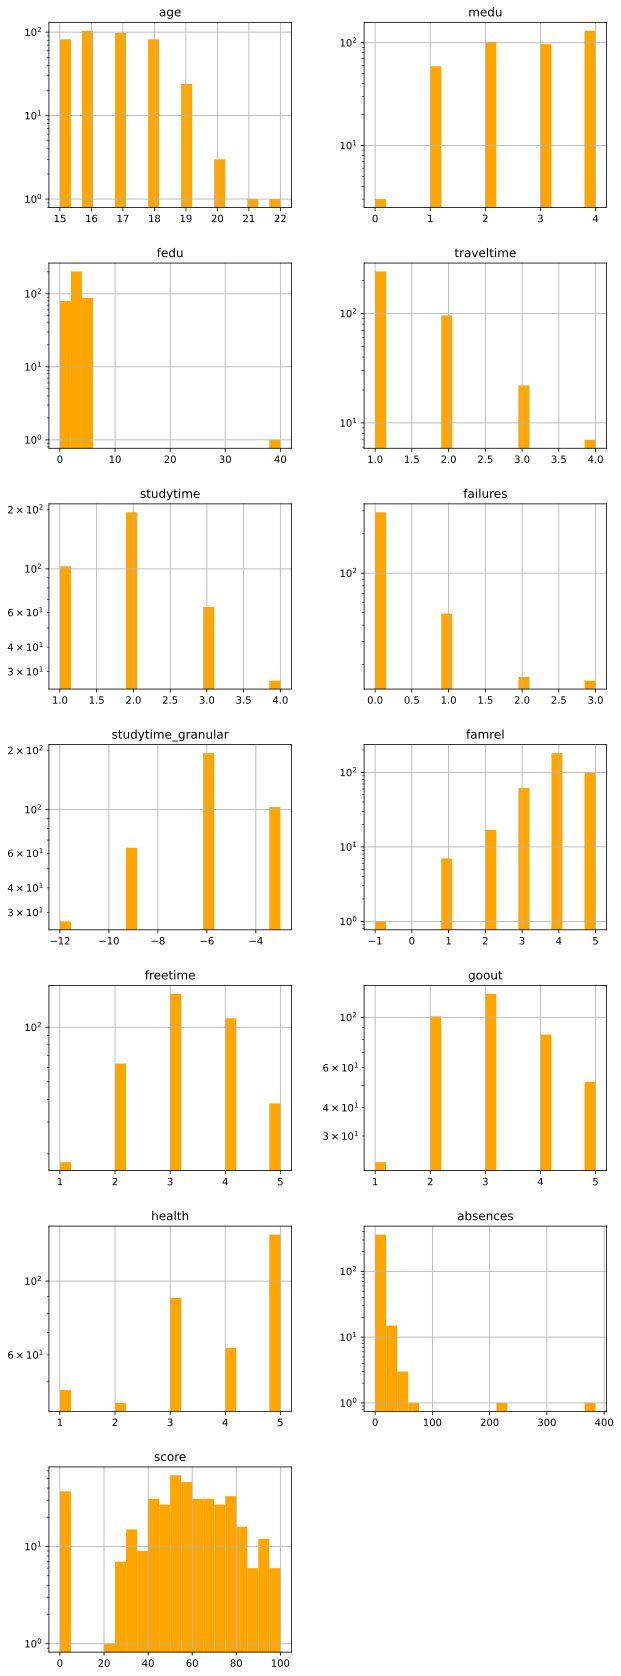

In [7]:
# Посмотрим на распределение числовых признаков в датасете
numerical_features = student_df.select_dtypes(include='number').columns
h =student_df[numerical_features].hist(figsize=(10,30), 
                                       layout=(int(len(numerical_features)/2)+1,2), 
                                       bins=20,
                                       color=['orange'],
                                       log = True) # прологарифмируем, чтобы лучше было видно выбросы

In [8]:
# 1) fedu (образование отца) - один выброс на отметке: 40
student_df = student_df.loc[student_df.fedu <= 4]

# 2) studytime_granular - неизвестное поле, по нему нельзя сказать: есть выбросы или нет

# 3) famrel (семейные отношения) - один выброс на отметке: -1
student_df = student_df.loc[student_df.famrel >= 1]

# 4) absences (количество  пропущенных занятий) - есть явные выбросы
emission_limits = get_emission_limits(student_df.absences)
student_df = student_df.loc[student_df.absences.between(emission_limits[0], emission_limits[1])]

# 5) score - присутствует выброс в 0, но это скорее всего те кто не сдавал экзамен по какой-либо причине

# В остальных количественных переменных выбросов нет

| Min | 25 | IQR | 75 | Max |
|-----|----|-----|----|-----|
-12.0|0.0|8.0|8.0|20.0

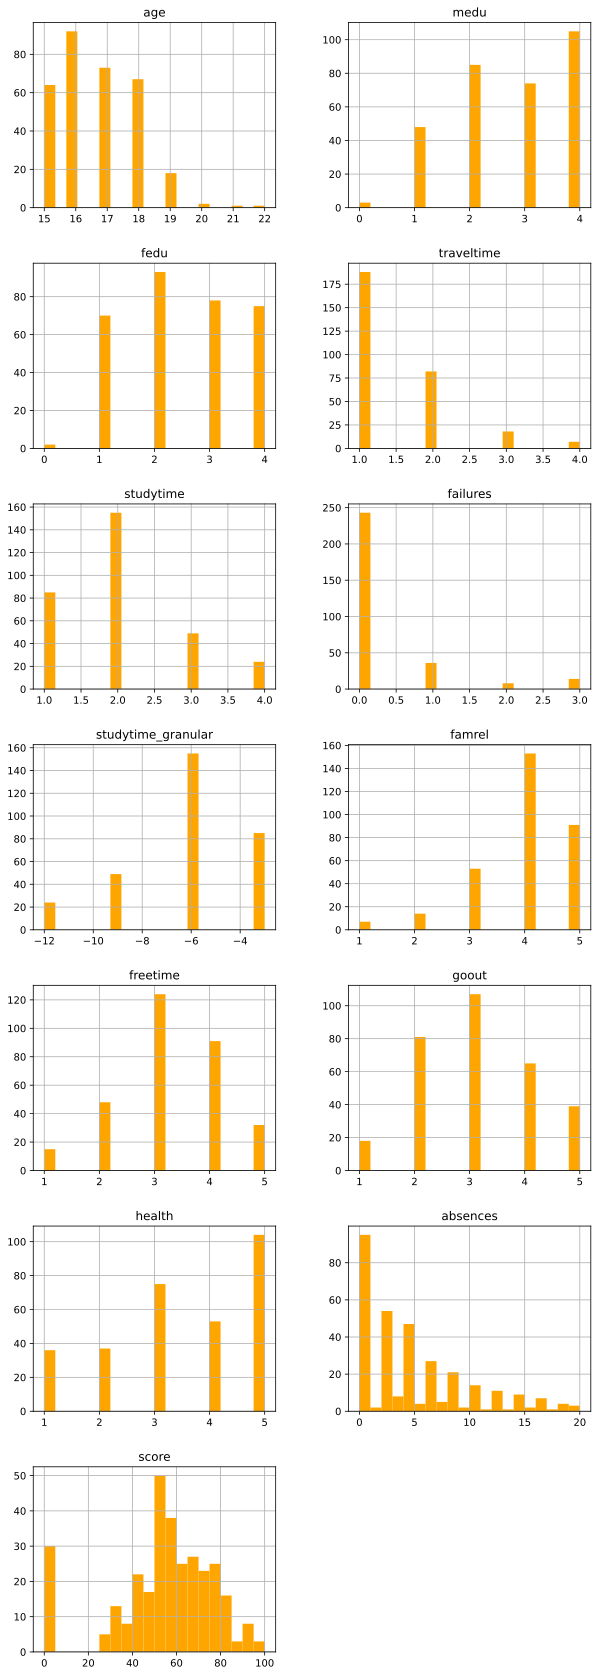

In [9]:
# После удаления выбросов еще раз посмотрим на распределение числовых признаков в датасете (значение nan выводим для наглядности)
numerical_features = student_df.select_dtypes(include='number').columns

h =student_df[numerical_features].hist(figsize=(10,30), 
                                       layout=(int(len(numerical_features)/2)+1,2),
                                       bins = 20, 
                                       color=['orange'])

## Замена пропусков
Решение о замене пропусков аналитиком принимается на основе:

1. Информации об объёме пропусков.
2. Информации о том,  какой алгоритм планируется использовать.

Если пропусков:
* мало (менее 10%) и алгоритм толерантен к их наличию, то можно не заморачиваться, либо заполнить самым простым способом.
* умеренно (до 30%), то замена пропусков может быть более эффективна, чем удаление/незамена.
* много (более 40%), то стоит задуматься над более тщательным сбором данных или исключении этого столбца как неинформативного.

In [10]:
# В нашем датасете 27 из 30 переменых имеют пропуски, Больше всего пропусков содержит переменная pstatus: 11,4%
# Заполним пропуски: 

# Для количественных переменных - медианой
columns_list = student_df.select_dtypes(include='number').columns # перечень количественных столбцов
student_df = fill_nan(student_df, columns_list)

# Для номинативных переменных модой
columns_list = student_df.select_dtypes(include='object').columns # перечень номинативных столбцов
student_df = fill_nan(student_df, columns_list, fill_type='mode')

dataset_custom_description(student_df)

## Общая информация

| Характеристика   |      Значение      |
                        |:----------|:-------------|
                        |**количество (строк, столбцов):**|(318, 30)|
                        |**количество строк:<br><small>(ни одного пустого значения)</small>**|318|
                        |**количество строк:<br><small>(хотябы одно пустое значение)</small>**|0|
                        |**распределение типов столбцов:**|object (17)<br>float64 (12)<br>int64 (1)|
                        

## Информация о столбцах

,name,type,non_null,null,null_mean,unique,mean,std,min,25%,50%,75%,max,distribution
0,school,object,318,0,0.0%,2,,,,,,,,GP - 279 | MS - 39
1,sex,object,318,0,0.0%,2,,,,,,,,F - 168 | M - 150
2,age,int64,318,0,0.0%,8,16.68,1.27,15,16,17,18,22,16 - 92 | 17 - 73 | 18 - 67 | 15 - 64 | 19 - 18 | 20 - 2 | 22 - 1 | 21 - 1
3,address,object,318,0,0.0%,2,,,,,,,,U - 249 | R - 69
4,famsize,object,318,0,0.0%,2,,,,,,,,GT3 - 232 | LE3 - 86
5,pstatus,object,318,0,0.0%,2,,,,,,,,T - 292 | A - 26
6,medu,float64,318,0,0.0%,5,2.73,1.10,0,2,3,4,4,4.0 - 105 | 2.0 - 85 | 3.0 - 77 | 1.0 - 48 | 0.0 - 3
7,fedu,float64,318,0,0.0%,5,2.48,1.10,0,2,2,3,4,2.0 - 93 | 3.0 - 78 | 4.0 - 75 | 1.0 - 70 | 0.0 - 2
8,mjob,object,318,0,0.0%,5,,,,,,,,other - 124 | services - 73 | at_home - 50 | teacher - 42 | health - 29
9,fjob,object,318,0,0.0%,5,,,,,,,,other - 193 | services - 79 | teacher - 22 | at_home - 14 | health - 10


## 3. Оценка количества уникальных значений для номинативных переменных

In [11]:
# Отберем столбцы с номинативными переменными
object_features = student_df.select_dtypes(include='object').columns

# Отобразим информацию о номинативных переменных
dataset_custom_description(student_df[object_features])
#student_df.describe(include='all')

## Общая информация

| Характеристика   |      Значение      |
                        |:----------|:-------------|
                        |**количество (строк, столбцов):**|(318, 17)|
                        |**количество строк:<br><small>(ни одного пустого значения)</small>**|318|
                        |**количество строк:<br><small>(хотябы одно пустое значение)</small>**|0|
                        |**распределение типов столбцов:**|object (17)|
                        

## Информация о столбцах

,name,type,non_null,null,null_mean,unique,mean,std,min,25%,50%,75%,max,distribution
0,school,object,318,0,0.0%,2,,,,,,,,GP - 279 | MS - 39
1,sex,object,318,0,0.0%,2,,,,,,,,F - 168 | M - 150
2,address,object,318,0,0.0%,2,,,,,,,,U - 249 | R - 69
3,famsize,object,318,0,0.0%,2,,,,,,,,GT3 - 232 | LE3 - 86
4,pstatus,object,318,0,0.0%,2,,,,,,,,T - 292 | A - 26
5,mjob,object,318,0,0.0%,5,,,,,,,,other - 124 | services - 73 | at_home - 50 | teacher - 42 | health - 29
6,fjob,object,318,0,0.0%,5,,,,,,,,other - 193 | services - 79 | teacher - 22 | at_home - 14 | health - 10
7,reason,object,318,0,0.0%,4,,,,,,,,course - 122 | reputation - 84 | home - 82 | other - 30
8,guardian,object,318,0,0.0%,3,,,,,,,,mother - 228 | father - 69 | other - 21
9,schoolsup,object,318,0,0.0%,2,,,,,,,,no - 278 | yes - 40


### Уникальных значений в номинативных столбцах немного 2,3,4,5.

1. Переменная **school** - содержит два уникальных значения GP и MS. Считаю, что ее нельзя преобразовывать в количественную, тк могут появиться другие абревиатуры. Оставляю без изменений.

2. Переменная **sex** - содержит два уникальных значения M и F. Считаю, что ее возможно преобразовывать в количественную, тк другие значение пола появиться не могут.

3. Переменная **address** - содержит два уникальных значения U и R. Считаю, что ее нельзя преобразовывать в количественную, тк могут появиться другие типы адресов. Оставляю без изменений.

4. Переменная **famsize** - содержит два уникальных значения GT3  и LE3. Считаю, что ее нельзя преобразовывать в количественную, тк это ранговая переменная. Оставляю без изменений.

5. Переменная **pstatus** - содержит два уникальных значения T и A. Считаю, что  ее возможно преобразовывать в количественную, тк ее значение равносильны да/нет.

6. Переменные: **schoolsup, famsup, paid, activities, nursery, higher, internet, romantic** содержат два уникальных значения **yes** и **no**, что равносильной значениям 1 и 0 соответственно. Считаю, что данные переменные необходимо преобразовать в числовые.

## 4. Преобразование данных

In [12]:
# преобразуем переменную sex в количественную
student_df.sex = convert_feature_to_binary(student_df.sex, {'F' : 0, 'M' : 1})

# преобразуем переменную pstatus в количественную
student_df.pstatus = convert_feature_to_binary(student_df.pstatus, {'A' : 0, 'T' : 1})

# произведем замену в номинативных столбцах содержащих значения yes и no на 1 и 0
columns_binary =  ['schoolsup', 'famsup', 'paid', 'activities' ,'nursery', 'higher', 'internet', 'romantic']

for col in columns_binary:
    student_df[col] = convert_feature_to_binary(student_df[col],{'no' : 0, 'yes' : 1})

#dataset_custom_description(student_df)
# Посмотрим на распределение числовых признаков в датасете
# numerical_features = select_columns_by_type(student_df,['float64','int64'])
# h =student_df[numerical_features].hist(figsize=(10,30), 
#                                        layout=(int(len(numerical_features)/2)+1,2), 
#                                        bins=20,
#                                        )

## 5. Корреляционный анализ количественных переменных

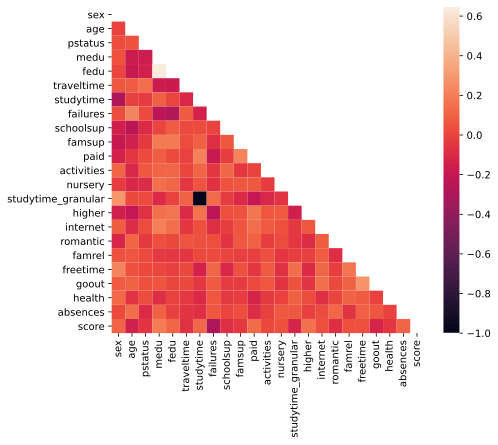

In [13]:
# p = sns.pairplot(student_df, kind = 'reg')
corr_matrix = student_df.corr()
plt.rcParams['figure.figsize'] = (7, 6)
matrix =  np.triu(corr_matrix)
x = sns.heatmap(corr_matrix, mask=matrix)

## 6. Отбор не коррелирующих переменных

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как **studytime** и **studytime_granular** сильно скоррелированы. Одну переменную можно исключить. Пусть это будет **studytime_granular**, тк она содержит неизвестные для нас значения.

In [14]:
# Удаляем studytime_granular
student_df.drop(['studytime_granular'], inplace = True, axis = 1)

## 7. Анализ номинативных переменных и устранение тех, которые не влияют на предсказываемую величину

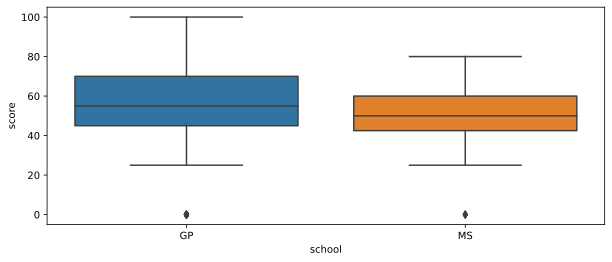

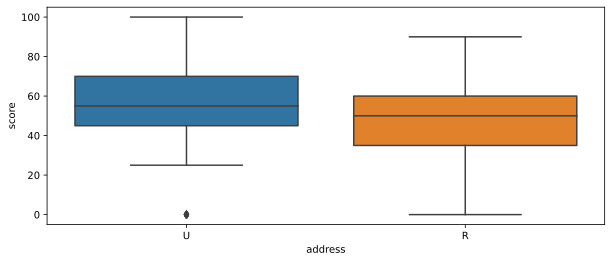

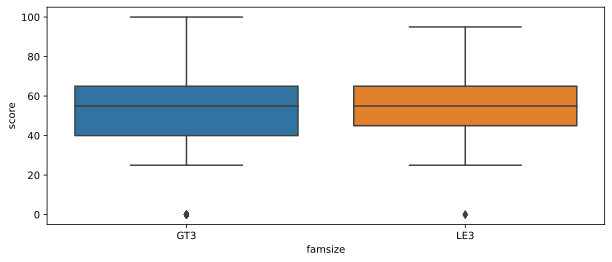

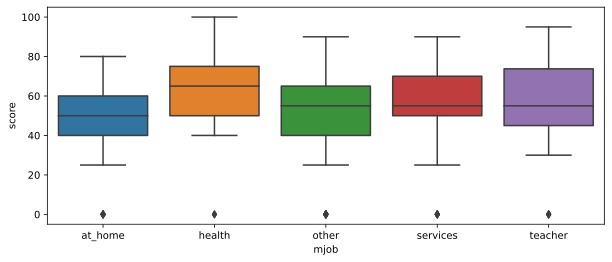

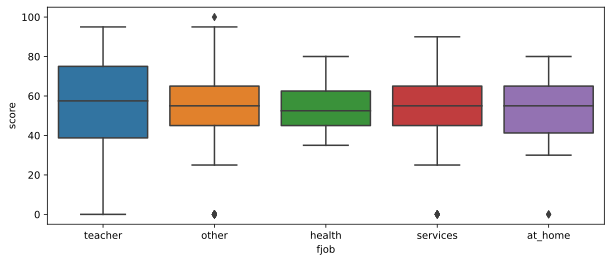

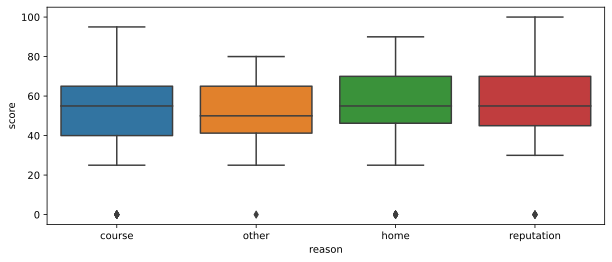

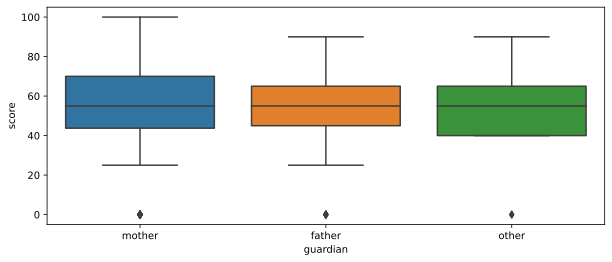

In [15]:
# Отберем столбцы с номинативными переменными
object_features = student_df.select_dtypes(include='object').columns

for col in object_features:
    get_boxplot(student_df, col,'score')

По графикам можно сделать вывод, что переменные, **famsize, fjob, reason, guardian** , слабо влияют на оценку **score**, тк среднее практически не изменяется.

In [16]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

object_features = student_df.select_dtypes(include='object').columns
non_stat_dif = get_stat_dif_custom(student_df,object_features,'score')  # после выполнения возвращает список статистически незначимых переменных 

Cтатистически значимые различия

| Переменная | Результат |
|------------|-----------|
|school|нет|
|address|есть|
|famsize|нет|
|mjob|нет|
|fjob|нет|
|reason|нет|
|guardian|нет|

In [17]:
#Как мы видим, серьёзно отличаются одна переменная: address	. Оставим эту переменную в датасете, а остальные номинативные переменные удалим

# Удаляем нстатистически незначимые переменные 
student_df.drop(non_stat_dif, inplace = True, axis=1)

## 8. Выводы относительно качества данных и тех переменных, которые будут использоватся в дальнейшем при построении модели

### В результате EDA влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

* В данных достаточно мало пустых значений, больше всего пропусков содержит переменная **pstatus**: 11,4%.
* Уникальных значений в номинативных столбцах немного - 2,3,4,5.
* Выбросы найдены только в переменных **fedu, famrel, absences**, что позволяет сделать вывод о том, что данные достаточно чистые. В переменной **score** присутствует выброс в 0, но это скорее всего те, кто не сдавал экзамен по какой-либо причине. Изучим выбросы **score** в дальнейшем.
* По раскрашенной матрице корреляций видно, что такие признаки как **studytime** и **studytime_granular** сильно скоррелированы. Исключим переменную **studytime_granular**.
* Заполним пропуски для количественных переменных - медианой, а для номенативных переменных - модой.
* Произведена конвертация переменных из номинативных в количественные, где значение примают только два состояния (1 или 0)
* Итоговый датасет представлен ниже.

In [18]:
# Итоговый датасет
dataset_custom_description(student_df)

## Общая информация

| Характеристика   |      Значение      |
                        |:----------|:-------------|
                        |**количество (строк, столбцов):**|(318, 23)|
                        |**количество строк:<br><small>(ни одного пустого значения)</small>**|318|
                        |**количество строк:<br><small>(хотябы одно пустое значение)</small>**|0|
                        |**распределение типов столбцов:**|float64 (21)<br>int64 (1)<br>object (1)|
                        

## Информация о столбцах

,name,type,non_null,null,null_mean,unique,mean,std,min,25%,50%,75%,max,distribution
0,sex,float64,318,0,0.0%,2,0.47,0.50,0,0,0,1,1,0.0 - 168 | 1.0 - 150
1,age,int64,318,0,0.0%,8,16.68,1.27,15,16,17,18,22,16 - 92 | 17 - 73 | 18 - 67 | 15 - 64 | 19 - 18 | 20 - 2 | 22 - 1 | 21 - 1
2,address,object,318,0,0.0%,2,,,,,,,,U - 249 | R - 69
3,pstatus,float64,318,0,0.0%,2,0.92,0.27,0,1,1,1,1,1.0 - 292 | 0.0 - 26
4,medu,float64,318,0,0.0%,5,2.73,1.10,0,2,3,4,4,4.0 - 105 | 2.0 - 85 | 3.0 - 77 | 1.0 - 48 | 0.0 - 3
5,fedu,float64,318,0,0.0%,5,2.48,1.10,0,2,2,3,4,2.0 - 93 | 3.0 - 78 | 4.0 - 75 | 1.0 - 70 | 0.0 - 2
6,traveltime,float64,318,0,0.0%,4,1.44,0.70,1,1,1,2,4,1.0 - 211 | 2.0 - 82 | 3.0 - 18 | 4.0 - 7
7,studytime,float64,318,0,0.0%,4,2.04,0.85,1,1,2,2,4,2.0 - 160 | 1.0 - 85 | 3.0 - 49 | 4.0 - 24
8,failures,float64,318,0,0.0%,4,0.30,0.72,0,0,0,0,3,0.0 - 260 | 1.0 - 36 | 3.0 - 14 | 2.0 - 8
9,schoolsup,float64,318,0,0.0%,2,0.13,0.33,0,0,0,0,1,0.0 - 278 | 1.0 - 40
